# E-news Express Project

### Objective: Statistical analysis of business data. Explore the dataset and extract insights from the data.


### Key Questions to answer : 
* Do the users spend more time on the new landing page than the old landing page?
* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
* Does the converted status depend on the preferred language?
* Is the mean time spent on the new page same for the different language users?



### Data Description :
1. user_id - This represents the user ID of the person visiting the website.
2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3. landing_page - This represents whether the landing page is new or old.
4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.
6. language_preferred - This represents the language chosen by the user to view the landing pa



### Import the necessary libraries - pandas, numpy, seaborn, matplotlib.pyplot,scipy e.t.c

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import the scipy.This library contains a large number of probability distributions as well as a growing library of statistical functions.
import scipy.stats as stats 

# import the required function
from scipy.stats import norm

### Load the dataset

In [3]:
# Reading the CSV data file
eNewsData = pd.read_csv('../data/abtest.csv')

In [4]:
# Check the shape of dataset.
eNewsData.shape

(100, 6)

In [5]:
### Check the datatype and info of the variables to make sure that the data is read in properly

In [6]:
eNewsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.2+ KB


In [7]:
eNewsData["group"] = eNewsData["group"].astype("category")
eNewsData["landing_page"] = eNewsData["landing_page"].astype("category")
eNewsData["converted"] = eNewsData["converted"].astype("category")
eNewsData["language_preferred"] = eNewsData["language_preferred"].astype("category")

In [8]:
eNewsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.3 KB


In [9]:
# Checking for missing value or null value in dataset
eNewsData.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [10]:
# Reading first 5 rows. 
eNewsData.head()

user_id      group landing_page  time_spent_on_the_page converted  \
0   546592    control          old                    3.48        no   
1   546468  treatment          new                    7.13       yes   
2   546462  treatment          new                    4.40        no   
3   546567    control          old                    3.02        no   
4   546459  treatment          new                    4.75       yes   

  language_preferred  
0            Spanish  
1            English  
2            Spanish  
3             French  
4            Spanish

In [11]:
eNewsData.describe(include=["category"])

group landing_page converted language_preferred
count       100          100       100                100
unique        2            2         2                  3
top     control          new       yes             French
freq         50           50        54                 34

**Observations**
* All 6 column have 100 observations indicating that there are no missing values in it.
* group, landing_page,converted and language_preferred read as 'object' data type.
* The E-news Express dataset has 100 rows and 6 columns.
* E-news Express dataset has group,landing_page, converted and language_preferred as qualitative or catagorical data. 
* E-news Express dataset has time_spent_on_the_page as quantitative data. 


# Exploratory Data Analysis

# <span style="font-family: Arial; font-weight:bold;font-size:.9em;color:#0e92ea"> Univariate Analysis of E-news Express Data

In [12]:
# Univariate Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

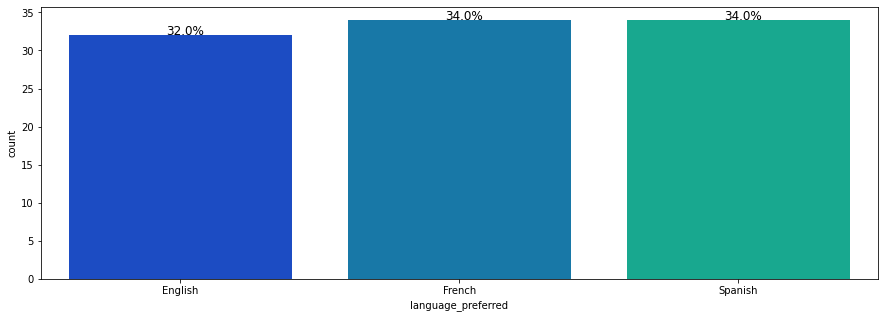

In [13]:
plt.figure(figsize=(15,5))
ax = sns.countplot(eNewsData["language_preferred"],palette='winter')
perc_on_bar(ax,eNewsData["language_preferred"])

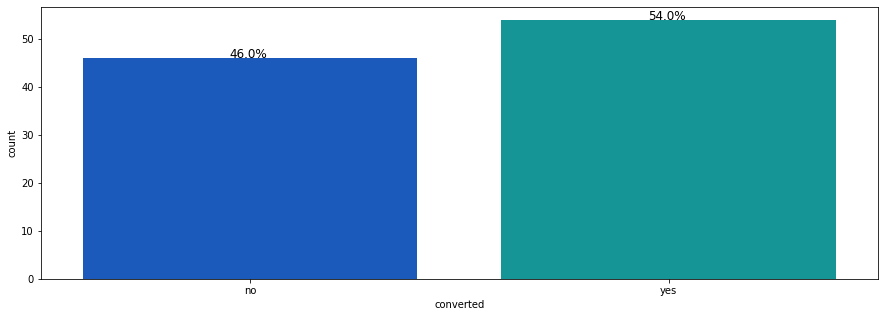

In [14]:
plt.figure(figsize=(15,5))
ax = sns.countplot(eNewsData["converted"],palette='winter')
perc_on_bar(ax,eNewsData["converted"])

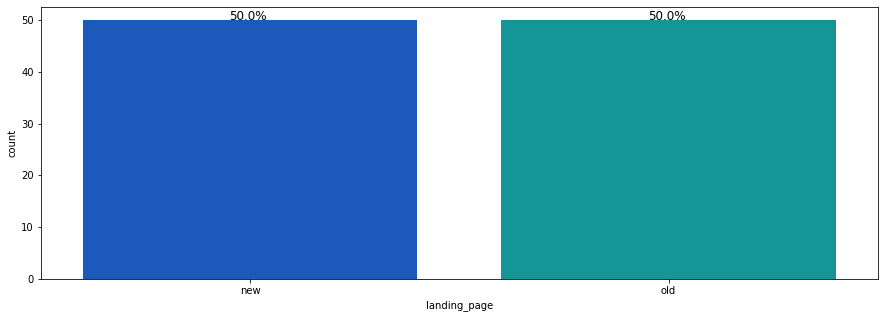

In [15]:
plt.figure(figsize=(15,5))
ax = sns.countplot(eNewsData["landing_page"],palette='winter')
perc_on_bar(ax,eNewsData["landing_page"])

### Observations
1. 34% Users preferred language for the page are Spanish and French. 
2. 32% Users preferred language for the page is English.
3. 54% Users subscribed to the news portal and 46% users did not not converted to the subscription. 
4. The population which use the old and new page are equally distributed i.e. 50%


# <span style="font-family: Arial; font-weight:bold;font-size:.9em;color:#0e92ea"> Bi Variate  Analysis of E-news Express Data

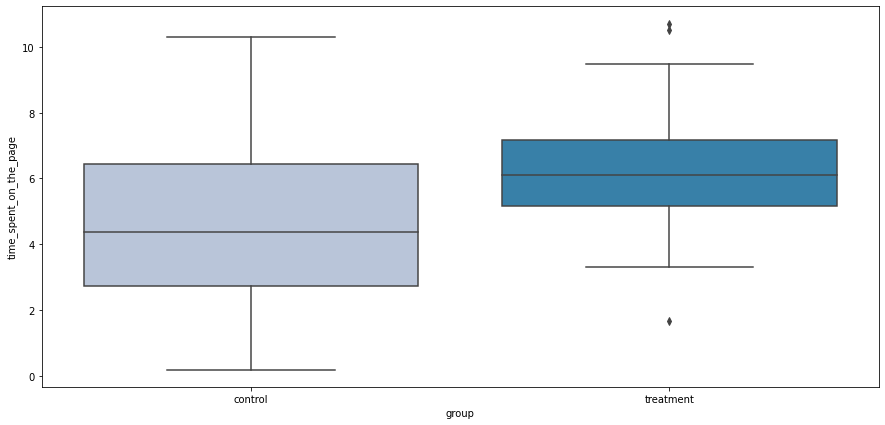

In [16]:
#Bivariate analysis between group and time spent on the page
plt.figure(figsize=(15,7))
sns.boxplot(eNewsData["group"],eNewsData["time_spent_on_the_page"],palette="PuBu")
plt.show()

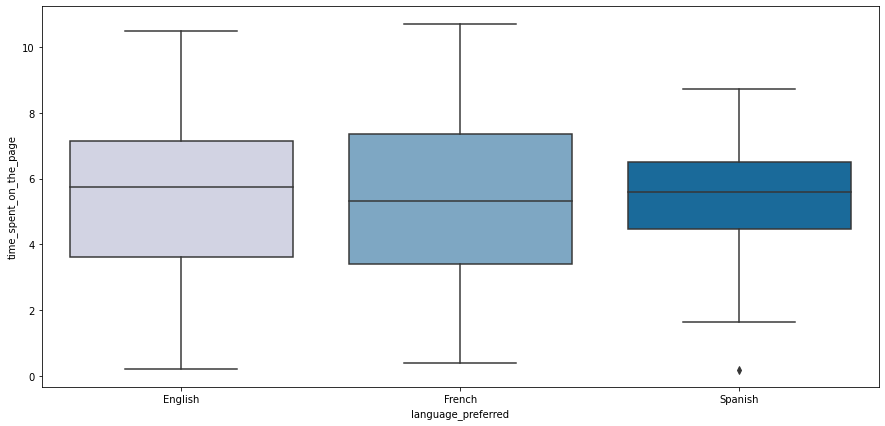

In [17]:
#Bivariate analysis between Language Preferred and time spent on the page
plt.figure(figsize=(15,7))
sns.boxplot(eNewsData["language_preferred"],eNewsData["time_spent_on_the_page"],palette="PuBu")
plt.show()

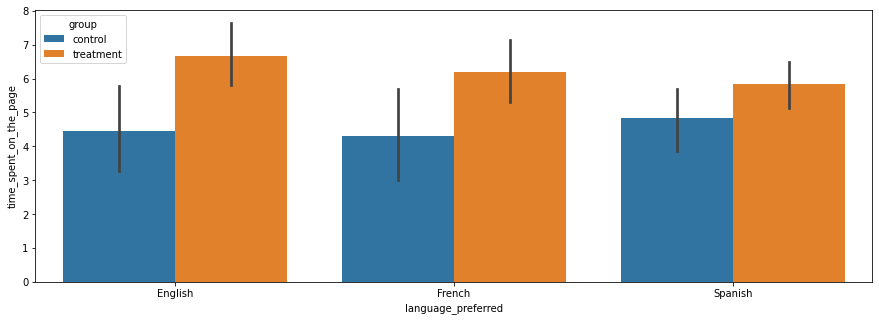

In [18]:
#Bivariate analysis through barplot between language Preferred and time spent on the page by different group  
plt.figure(figsize=(15,5))
sns.barplot(data=eNewsData,x='language_preferred',y='time_spent_on_the_page',hue='group')
plt.show()

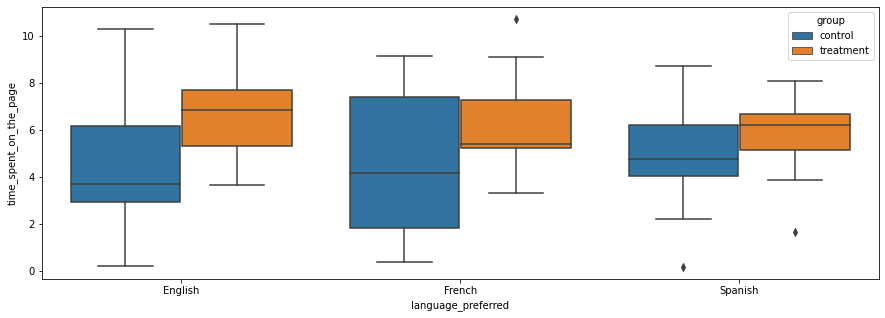

In [19]:
plt.figure(figsize=(15,5))
sns.boxplot(data=eNewsData,x='language_preferred',y='time_spent_on_the_page',hue='group')
plt.show()

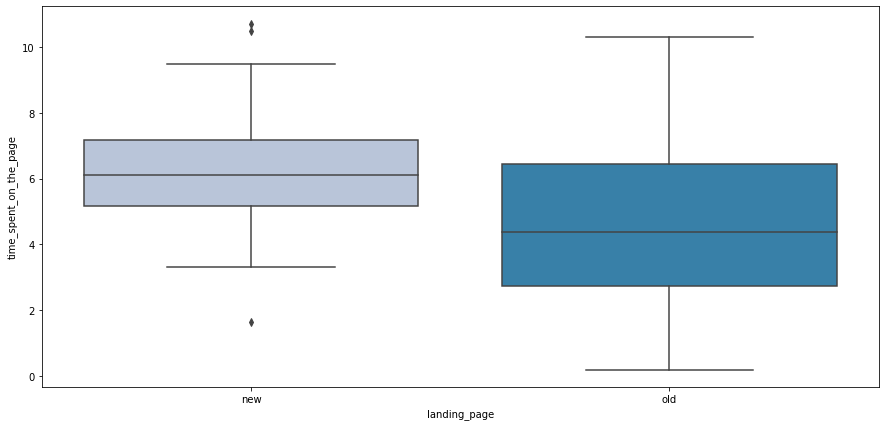

In [20]:
#Bivariate analysis between Landing page (Old v/s New) and time spent on the page

plt.figure(figsize=(15,7))
sns.boxplot(eNewsData["landing_page"],eNewsData["time_spent_on_the_page"],palette="PuBu")
plt.show()

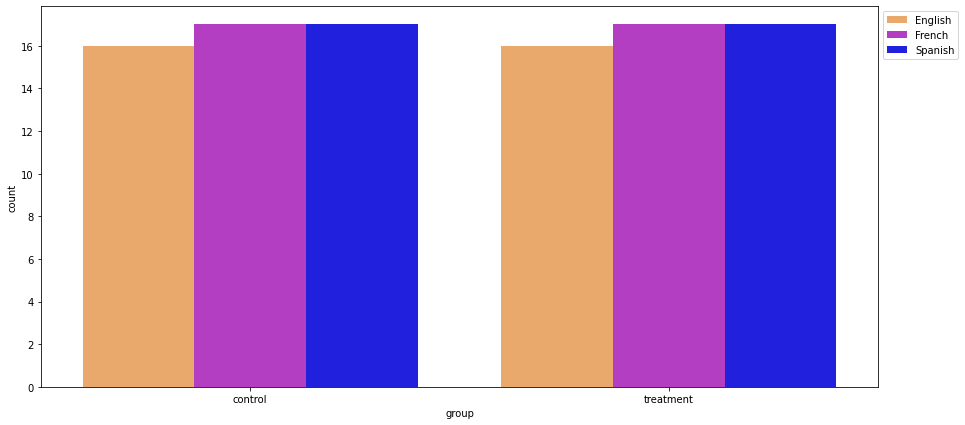

In [21]:
#Bivariate analysis between the preffered language and group
plt.figure(figsize=(15,7))
sns.countplot(eNewsData["group"],hue=eNewsData["language_preferred"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Bivariate Observations
1. The treatment group which is been served with new landing page spent more time on the page. 
2. The outliers exists with-in the treatment group. 
3. In all the language catagory English, Spanish and French users spent more time on the new landing page. 
4. Spanish and French users count are more than English users in both the catagory i.e. control v/s treatment. 

# Statistical analysis of E-News Express data

## 2. Do the users spend more time on the new landing page than the old landing page?

### To compare user spend more time on new v/s old page we will have to do a Hypothesis on the population sample data which is randomly taken. We randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group)

Assuming time spent on old and new anding page are normally distributed, Lets find out if we have enough evidence to conclude that there is any difference between time spent on old and new landing page at 0.05 significance level?

### Let's write the null and alternative hypothesis

* Let $\mu_1$ = The mean time spent on the old page 
* $\mu_2$  = The mean time spent on the new page

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1<\mu_2$


In [22]:
# find the sample means and sample standard deviations for the two samples
eNewsData.groupby('landing_page').agg({'time_spent_on_the_page': ['mean', 'std']})


time_spent_on_the_page          
                               mean       std
landing_page                                 
new                          6.2232  1.817031
old                          4.5324  2.581975

In [23]:
##Group by Landing page 
df1 = eNewsData.groupby('landing_page')

In [24]:
# Getting the Mean time spent on the old landing page and new landing page 

mu1_old_landing_page = round(df1['time_spent_on_the_page'].get_group('old').mean(), 2)

mu2_new_landing_page = round(df1['time_spent_on_the_page'].get_group('new').mean(), 2)

print('The mean time spent on old page is ', mu1_old_landing_page)
print('The mean time spent on new page is ', mu2_new_landing_page)

The mean time spent on old page is  4.53
The mean time spent on new page is  6.22


In [25]:
# Getting the standard deviations of time spent on the old landing page and new landing page.  

sigma1_old_landing_page = round(df1['time_spent_on_the_page'].get_group('old').std(), 2)
sigma2_new_landing_page = round(df1['time_spent_on_the_page'].get_group('new').std(), 2)

print('The mean time spent on old page is ',   sigma1_old_landing_page)
print('TThe mean time spent on new page is', sigma2_new_landing_page)



The mean time spent on old page is  2.58
TThe mean time spent on new page is 1.82


## Visualization of normal distribution


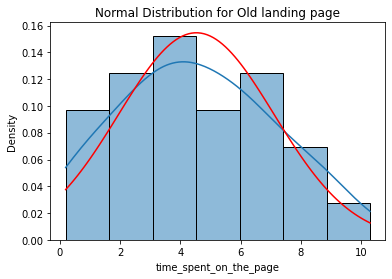

In [26]:

density = pd.DataFrame() # create an empty DataFrame
density["x"] = np.linspace(
    df1['time_spent_on_the_page'].get_group('old').min(), df1['time_spent_on_the_page'].get_group('old').max(), 100) # create an array of 100 numbers in between the min and max score range and store it in the first column of the empty DataFrame
density["pdf"] = norm.pdf(density["x"], mu1_old_landing_page, sigma1_old_landing_page) # calculate the pdf() of the created numbers and store it in another column named 'pdf'

fig, ax = plt.subplots() # create the subplot
sns.histplot(df1['time_spent_on_the_page'].get_group('old'), ax=ax, kde=True, stat="density") # plot the distribution of data using histogram
ax.plot(density["x"], density["pdf"], color="red") # plot the pdf of the normal distribution
plt.title("Normal Distribution for Old landing page") # set the title
plt.show() # display the plot

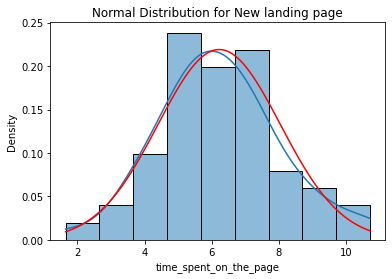

In [27]:
density = pd.DataFrame() # create an empty DataFrame
density["x"] = np.linspace(
    df1['time_spent_on_the_page'].get_group('new').min(), df1['time_spent_on_the_page'].get_group('new').max(), 100
) # create an array of 100 numbers in between the min and max score range and store it in the first column of the empty DataFrame
density["pdf"] = norm.pdf(density["x"], mu2_new_landing_page, sigma2_new_landing_page) # calculate the pdf() of the created numbers and store it in another column named 'pdf'

fig, ax = plt.subplots() # create the subplot
sns.histplot(df1['time_spent_on_the_page'].get_group('new'), ax=ax, kde=True, stat="density") # plot the distribution of data using histogram
ax.plot(density["x"], density["pdf"], color="red") # plot the pdf of the normal distribution
plt.title("Normal Distribution for New landing page") # set the title
plt.show() # display the plot

### Let's test whether the Z-test assumptions are satisfied or not

* Continuous data - The ratings are measured on a continuous scale.
* Normally distributed populations or Sample sizes > 30 - Since the sample sizes are greater than 30, Central Limit Theorem states that the distribution of sample means will be normal.
* Independent populations - As we are taking samples for two different landing pages , the two samples are from two independent populations.
* Known population standard deviation $\sigma_1$ and $\sigma_2$ - Yes, we know the population standard deviations of both the populations.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Voila! We can use two sample Z-test for this problem.


### Let's find the p-value

In [28]:
# user-defined function to compare the equality of two means from two independent populations, where population standard deviations are known
# this function returns the p-value for one tailed test
# for two-tailed test, multiply the p-value by 2
# To know more about the derivation of test statistic and standard error formula, please refer to the monographs and additional materials
def ztest_2samp(X1, X2, pop_sd1, pop_sd2, n1, n2):
    '''
    X1 - first of the two independent samples (sample 1)
    X2 - second of the two independent samples (sample 2)
    pop_sd1 - population standard deviation of sample 1
    pop_sd2 - population standard deviation of sample 2
    n1 - size of sample 1
    n2 - size of sample 2
    '''
    from numpy import sqrt, abs # import the required functions
    from scipy.stats import norm # import the required function
    se = sqrt(pop_sd1**2/n1 + pop_sd2**2/n2) # calculate the standard error
    test_stat = ((X1.mean() - X2.mean()) - 0)/ se # calculate the test statistic
    pval = 1 - norm.cdf(abs(test_stat)) # calculate the one-tailed p-value
    return pval # return the p-value

In [29]:
## Time spent on old Landing page X1 - first of the two independent samples (sample 1)
X1 = df1['time_spent_on_the_page'].get_group('old')


In [30]:
## Time pent on new Landing page X2 - second of the two independent samples (sample 2)
X2 = df1['time_spent_on_the_page'].get_group('new')


In [31]:
# find the p-value using the ztest_2samp() function
p_value = ztest_2samp(X1.dropna(), X2.dropna(), sigma1_old_landing_page, sigma2_new_landing_page, 50 ,50)
print('The P-value is', p_value)

The P-value is 7.634426865454902e-05


### Insight
As the p-value is much less than the level of significance 0.05, we reject the null hypothesis. Thus, we have enough statistical evidence to say that users spent less time on old landing page than new landing page.

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### This hypothesis seems to be a good fit into the Two Proportion Z-test. Lets do statistical analysis based upon the proportion of the sample data. 
## Let's write the null and alternative hypothesis

* Let p_1 = Proportions of users converted to the new landing page i.e. Converted = Yes
* Let p_2 = Proportions of users not converted to the new landing page i.e. Converted = No


We will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 \neq p_2$



### Let's test whether the Z-test assumptions are satisfied or not

*   Binomially distributed population - Yes, a user is either converted or not-converted.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.

#### All the conditions are satisfied for two pproportions Z-test


### Let's find the p-value

In [32]:
ctab = pd.crosstab(eNewsData["landing_page"],eNewsData["converted"])
ctab

converted     no  yes
landing_page         
new           17   33
old           29   21

In [47]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# get proportion count of user on new landing page and converted
new_converted = 33 
# get proportion count of user on old landing page and converted  
old_converted = 21 

# set the counts of converted users
total_converted_count = np.array([33, 21])
# sample sizcount
nobs = np.array([50, 50])
# find the p-value
test_stat, p_value = proportions_ztest(total_converted_count, nobs, alternative='two-sided')
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


### Conclusion
As the p-value is Less than the significance level 0.05, we can reject the null hypothesis. Thus, We can reach to the conclusion that conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page. We can also see this from the new_converted count which is also greated than old_converted count. 

## 4. Does the converted status depend on the preferred language? 

### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ Converted Status is independent of Language.

against the alternate hypothesis

>$H_a:$ Converted Status is dependent of Language.

In [34]:
ltab = pd.crosstab(eNewsData["converted"],eNewsData["language_preferred"])
ltab

language_preferred  English  French  Spanish
converted                                   
no                       11      19       16
yes                      21      15       18

### Let's test whether the assumptions for Chi-Square Test for independence are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


In [35]:
### Let's find the p-value

In [48]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(ltab)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Insight

As the p-value is higher than the significance level, we are failed to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that conversion status is dependent on preferred language.

## 5. Is the mean time spent on the new page same for the different language users

### Let's write the null and alternative hypothesis for One Way ANOVA Test.

Let $\mu_1, \mu_2, \mu_3$ be the means of time_spent_on_the_page for English, Spanish and French for new page respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one time_spent_on_the_page for new page for one language is different from the rest.


In [37]:
new_page_data= eNewsData[eNewsData["landing_page"]=='new']
new_page_data.head()


user_id      group landing_page  time_spent_on_the_page converted  \
1   546468  treatment          new                    7.13       yes   
2   546462  treatment          new                    4.40        no   
4   546459  treatment          new                    4.75       yes   
6   546448  treatment          new                    5.25       yes   
8   546461  treatment          new                   10.71       yes   

  language_preferred  
1            English  
2            Spanish  
4            Spanish  
6             French  
8             French

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


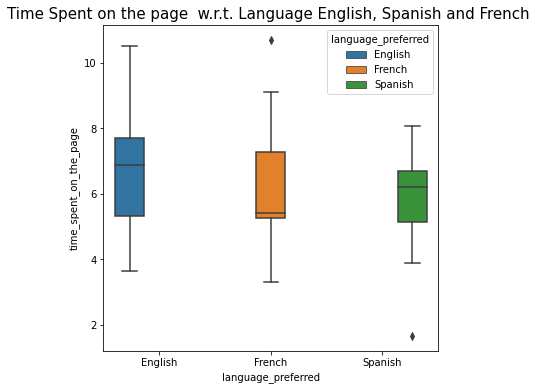

In [38]:
# mean of time_spent_on_the_page for new page with the language preferred
print(new_page_data.groupby("language_preferred")["time_spent_on_the_page"].mean())
# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = new_page_data, hue = 'language_preferred')
a.set_title("Time Spent on the page  w.r.t. Language English, Spanish and French ", fontsize=15)
plt.show()

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ time_spent_on_the_page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ time_spent_on_the_page does not follow a normal distribution

In [39]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(new_page_data['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040039539337158


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [40]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene(new_page_data['time_spent_on_the_page'][new_page_data['language_preferred']=="English"], 
                                   new_page_data['time_spent_on_the_page'][new_page_data['language_preferred']=="Spanish"], 
                                   new_page_data['time_spent_on_the_page'][new_page_data['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.


### Let's find the p-value

In [41]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(new_page_data['time_spent_on_the_page'][new_page_data['language_preferred']=="English"], 
                                   new_page_data['time_spent_on_the_page'][new_page_data['language_preferred']=="Spanish"], 
                                   new_page_data['time_spent_on_the_page'][new_page_data['language_preferred']=="French"])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Insight
As the p-value is much higher than the significance level, we failed to reject the null hypothesis. Hence, we do have enough statistical significance to conclude that mean time_spent_on_the_page is not much different at 5% significance level. 
